In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import tensorflow as tf

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

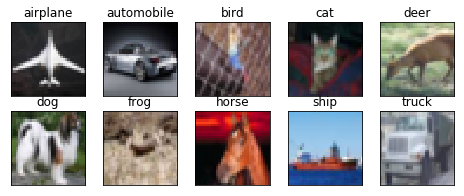

In [132]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_37 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 24s 63ms/step - loss: 1.8598 - acc: 0.2912 - val_loss: 1.4411 - val_acc: 0.4591
Epoch 2/100
390/390 [==============================] - 21s 53ms/step - loss: 1.3830 - acc: 0.4996 - val_loss: 1.1670 - val_acc: 0.5784
Epoch 3/100
390/390 [==============================] - 21s 53ms/step - loss: 1.1537 - acc: 0.5892 - val_loss: 0.9914 - val_acc: 0.6429
Epoch 4/100
390/390 [==============================] - 21s 53ms/step - loss: 1.0157 - acc: 0.6428 - val_loss: 0.8982 - val_acc: 0.6856
Epoch 5/100
390/390 [==============================] - 21s 53ms/step - loss: 0.9098 - acc: 0.6840 - val_loss: 0.8079 - val_acc: 0.7192
Epoch 6/100
390/390 [==============================] - 21s 53ms/step - loss: 0.8320 - acc: 0.7122 - val_loss: 0.7854 - val_acc: 0.7309
Epoch 7/100
390/390 [==============================] - 21s 53ms/step - loss: 0.7714 - acc: 0.7345 - val_loss: 0.7239 - val_acc: 0.7553
Epoch 8/100
390/390 [==============================] - 

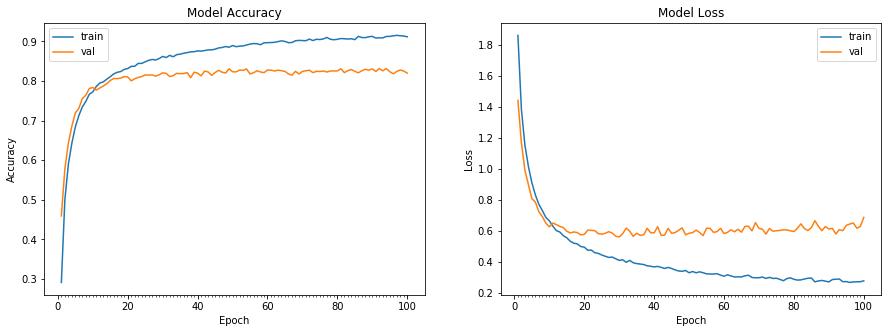

Accuracy on test data is: 81.97


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Assignment 6A


In [136]:
# Define the model
model = Sequential()
# input: 32 output: 32 | RF: 0
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 32 output: 30 | RF: 3
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 30 output: 28 | RF: 5
#model.add(Convolution2D(32, 1, 1, activation='relu')) #22
# input: 28 output: 14 | RF: 10
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 1, 1, activation='relu')) #22

# input: 14 output: 14 | RF: 10
model.add(Convolution2D(64, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 14 output: 12 | RF: 12
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 12 output: 10 | RF: 14
#model.add(Convolution2D(32, 1, 1, activation='relu')) #22
# input: 10 output: 5 | RF: 28
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Convolution2D(32, 1, 1, activation='relu')) #22


# input: 5 output: 5 | RF: 28
model.add(Convolution2D(128, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 5 output: 3 | RF: 30
model.add(Convolution2D(256, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# input: 512 1-D array output:256 
#model.add(Dense(256))

#model.add(Convolution2D(32, 4, 4))
#model.add(Activation('relu'))
#model.add(BatchNormalization())

# input: 3 output: 1 | RF: 32          
model.add(Convolution2D(10,1,1, activation='softmax'))

# input: 256 output:10 (num_classes)

from keras.layers import GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
          

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Ke

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_64 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_55 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_65 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_56 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="softmax")`


In [137]:
# Mount google drive to store check point model results.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Specify gdrive path to where highest validation accuracy check point results to be stored.
import os 
checkpoint_path = "/content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment9a.hdf5"

In [0]:
from keras.callbacks import ModelCheckpoint
# Create checkpoint callback
cp_callback = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min', period=1,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=195, epochs=100)`
  del sys.path[0]


Epoch 1/100
195/195 [==============================] - 14s 73ms/step - loss: 2.0447 - acc: 0.4260 - val_loss: 1.9848 - val_acc: 0.4805

Epoch 00001: val_loss improved from inf to 1.98482, saving model to /content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment9a.hdf5
Epoch 2/100
195/195 [==============================] - 10s 49ms/step - loss: 1.8989 - acc: 0.5788 - val_loss: 1.9571 - val_acc: 0.5060

Epoch 00002: val_loss improved from 1.98482 to 1.95709, saving model to /content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment9a.hdf5
Epoch 3/100
195/195 [==============================] - 10s 49ms/step - loss: 1.8372 - acc: 0.6411 - val_loss: 1.9112 - val_acc: 0.5523

Epoch 00003: val_loss improved from 1.95709 to 1.91118, saving model to /content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment9a.hdf5
Epoch 4/100
195/195 [==============================] - 10s 49ms/step - loss: 1.8033 - acc: 0.6779 - val_loss: 1.9375 - val_acc: 0.5246

Epoch 00004: val_loss did not improve from 

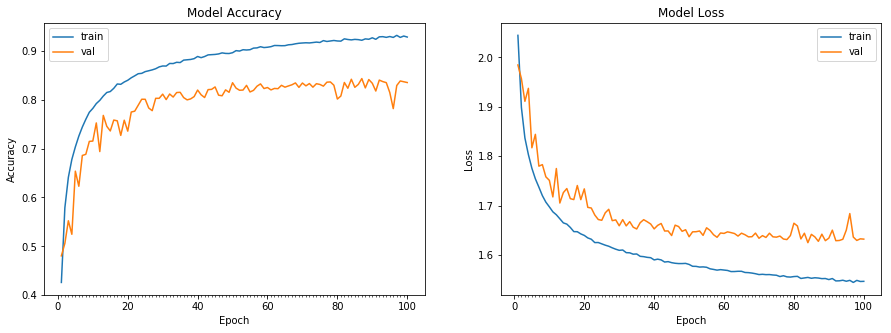

Accuracy on test data is: 83.52


In [140]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
                             


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), callbacks = [cp_callback], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Assignment9A:

*  Take your 6A Code (your optimized version, not the base version with Dense layer), and learn how to integrate gradCAM with your code. Learn more about gradCAM here. (Links to an external site.) <br>
*  As proof of integration, test 4 images (remember the image ids or names) from your network and show the visualization <br>

In [0]:
# Import packages for gradCAM
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
# Loading data from cifar10 data set
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()


In [145]:
test_features[0].shape

(32, 32, 3)

Class Idx:2, Class Label:cat 


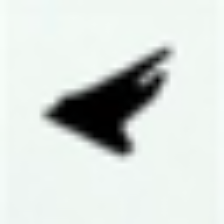

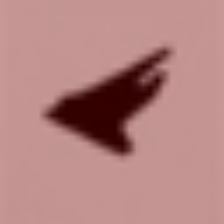

Class Idx:1, Class Label:ship 


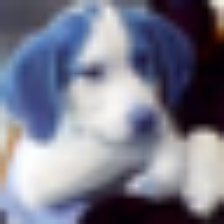

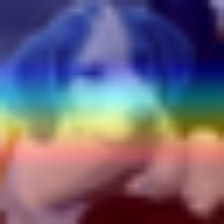

Class Idx:2, Class Label:ship 


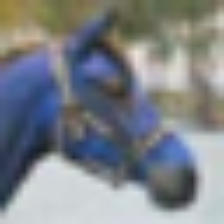

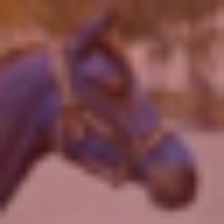

Class Idx:0, Class Label:airplane 


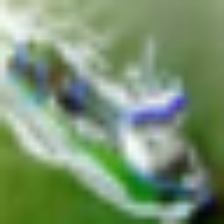

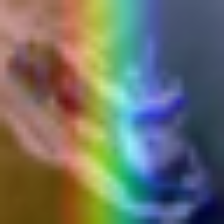

In [146]:
# Define cifar10 labels
label_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# cv2.imshow() is deprecated/crashed in jupyter, I used cv2_imshow() fro colab
from google.colab.patches import cv2_imshow

gradcam_test_features = [ test_features[21], test_features[16], test_features[17], test_features[15]]

for idx in range(4):
  img = gradcam_test_features[idx]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  
  
  last_conv_layer = model.get_layer("conv2d_90")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]


  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  print("Class Idx:%d, Class Label:%s "%(class_idx,label_names[test_labels[idx][0]]))
  # Resizing test image samples and superimposed image samples from 32,32,3 to 128,128,3
  large_img = new_image = cv2.resize(img,(224,224))
  cv2_imshow(large_img)
  #cv2_imshow(img)  
  large_superimposed_img = cv2.resize(superimposed_img,(224,224))
  cv2_imshow(large_superimposed_img)
  #cv2_imshow(superimposed_img)


### Conclusion
*  Trained model 6A, Since I have not saved model in googledrive. Highest validation accuracy achieved was 84.9%
*  For gradCAM experiment,  After we trained 6A model, randomly picked 4 test images of indices 21, 16, 17 and 15 and applied   gramCAM output shows class activation map covered only some portion of the object as you see above.

## Assignment 9B
Train your 6A model again, but this time add CutOut. Use this link https://github.com/yu4u/cutout-random-erasing (Links to an external site.) for reference. 
Show the same 4 images again with gradCAM's result. 
This is the second part of the assignment


In [92]:
# # Define the model
model = Sequential()
# input: 32 output: 32 | RF: 0
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 32 output: 30 | RF: 3
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 30 output: 28 | RF: 5
#model.add(Convolution2D(32, 1, 1, activation='relu')) #22
# input: 28 output: 14 | RF: 10
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 1, 1, activation='relu')) #22

# input: 14 output: 14 | RF: 10
model.add(Convolution2D(64, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 14 output: 12 | RF: 12
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())

# input: 10 output: 5 | RF: 28
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Convolution2D(32, 1, 1, activation='relu')) #22


# input: 5 output: 5 | RF: 28
model.add(Convolution2D(128, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
# input: 5 output: 3 | RF: 30
model.add(Convolution2D(256, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# input: 3 output: 1 | RF: 32          
model.add(Convolution2D(10,1,1, activation='softmax'))

# input: 256 output:10 (num_classes)

from keras.layers import GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
          

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Ke

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_30 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="softmax")`


In [0]:
from keras.callbacks import ModelCheckpoint

# Specify gdrive path to where highest validation accuracy check point results to be stored.
import os 
checkpoint_path = "/content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment9b_v1.hdf5"

# Create checkpoint callback
cp_callback = ModelCheckpoint(checkpoint_path,save_best_only=True,monitor='val_loss', mode='min', period=1, verbose=1)

In [0]:
# Source code for cutoff/randon_eraser

import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

Epoch 1/100
  2/195 [..............................] - ETA: 13s - loss: 1.9011 - acc: 0.5840

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=195, epochs=100)`
  from ipykernel import kernelapp as app


195/195 [==============================] - 9s 48ms/step - loss: 1.8893 - acc: 0.5917 - val_loss: 1.9499 - val_acc: 0.5147

Epoch 00001: val_loss improved from 2.10759 to 1.94993, saving model to /content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment9b_v1.hdf5
Epoch 2/100
195/195 [==============================] - 9s 48ms/step - loss: 1.8687 - acc: 0.6117 - val_loss: 2.0600 - val_acc: 0.3955

Epoch 00002: val_loss did not improve from 1.94993
Epoch 3/100
195/195 [==============================] - 9s 48ms/step - loss: 1.8579 - acc: 0.6235 - val_loss: 2.1842 - val_acc: 0.2650

Epoch 00003: val_loss did not improve from 1.94993
Epoch 4/100
195/195 [==============================] - 9s 48ms/step - loss: 1.8448 - acc: 0.6384 - val_loss: 1.9240 - val_acc: 0.5391

Epoch 00004: val_loss improved from 1.94993 to 1.92400, saving model to /content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment9b_v1.hdf5
Epoch 5/100
195/195 [==============================] - 9s 48ms/step - loss: 1.8321 - a

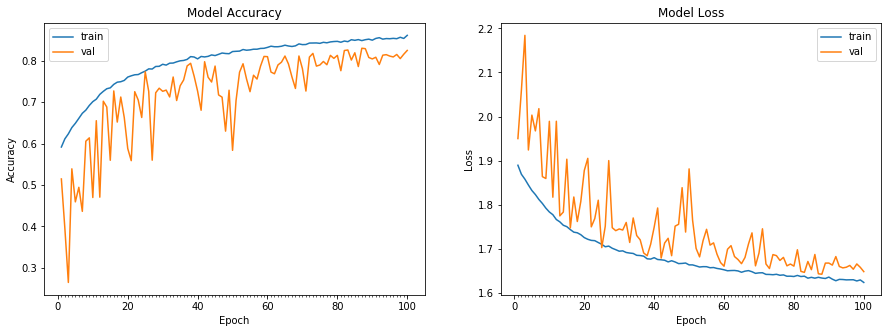

Accuracy on test data is: 82.47


In [88]:
from keras.preprocessing.image import ImageDataGenerator
pixel_level=False
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(p=0.3, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,v_l=0, v_h=128, pixel_level=False))
                             


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),
                                 callbacks = [cp_callback], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



In [0]:
# Load the model that has more validation accuracy from check point path
model.load_weights(checkpoint_path)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 77.19


###  gradCAM with CutOff Implementation

In [0]:
# Loading data from cifar10 data set
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
# Import packages for gradCAM
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

### Conclusion

Class Idx:1, Class Label:cat 


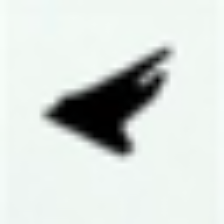

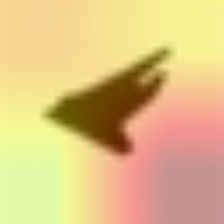

Class Idx:1, Class Label:ship 


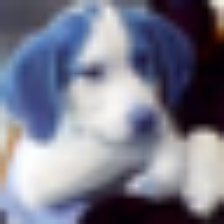

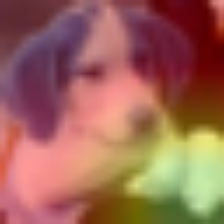

Class Idx:1, Class Label:ship 


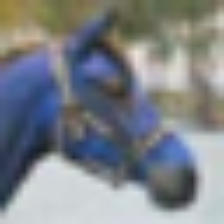

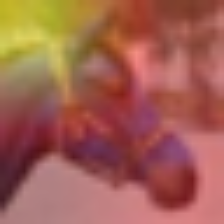

Class Idx:1, Class Label:airplane 


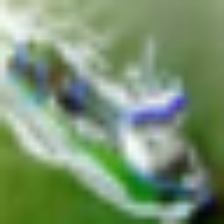

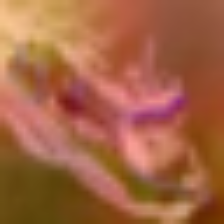

In [100]:
# Define cifar10 labels
label_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# cv2.imshow() is deprecated/crashed in jupyter, I used cv2_imshow() fro colab
from google.colab.patches import cv2_imshow

gradcam_test_features = [ test_features[21], test_features[16], test_features[17], test_features[15]]

for idx in range(4):
  img = gradcam_test_features[idx]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  
  
  last_conv_layer = model.get_layer("conv2d_45")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]


  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  print("Class Idx:%d, Class Label:%s "%(class_idx,label_names[test_labels[idx][0]]))
  # Resizing test image samples and superimposed image samples from 32,32,3 to 128,128,3
  large_img = new_image = cv2.resize(img,(224,224))
  cv2_imshow(large_img)
  #cv2_imshow(img)  
  large_superimposed_img = cv2.resize(superimposed_img,(224,224))
  cv2_imshow(large_superimposed_img)
  #cv2_imshow(superimposed_img)
    

### Conclusion9B:
*  Trained model 6A with cutoff configuration as get_random_eraser(p=0.3, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,v_l=0, v_h=128, pixel_level=False)  <br>
*  Highest validation accuracy 82.9% acheieved at 88th epoch during model training and Test accuracy is 82.4% on entire test dataset. <br>
*  For gradCAM experiment, Test data indcises taken are 21, 16, 17 and 15. After we trained 6A model using cutoff, gramCAM output shows class activation map covered entire image, before cutoff class activation map covers only some portion of the object. <br>




